In [1]:
import sys
sys.version

'3.7.9 | packaged by conda-forge | (default, Feb 13 2021, 20:03:11) \n[GCC 9.3.0]'

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 1.3 MB/s 


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/__notebook__.ipynb


In [4]:
def rgb_bgr(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import cv2
import os
import h5py

#--------------------
# tunable-parameters
#--------------------
images_per_class       = 500
fixed_size             = tuple((500, 500))
h5_train_data          = ''
h5_train_labels        = ''
bins                   = 8

In [6]:
import mahotas

In [7]:
def bgr_hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    return hsv_img


In [8]:
def img_segmentation(rgb_img,hsv_img):
    lower_green = np.array([25,0,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    lower_brown = np.array([10,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
    return final_result

In [9]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [10]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [11]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [12]:
os.listdir('../input/plantifydr-dataset/PlantDiseasesDataset/Cherry/train/')

['Cherry Powdery mildew', 'Cherry Healthy']

In [13]:
# get the training labels
train_labels = os.listdir('../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/')

# sort the training labels
train_labels = ['Grape Black Measles', 'Grape Black rot', 'Grape Healthy', 'Grape Isariopsis Leaf Spot']
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['Grape Black Measles', 'Grape Black rot', 'Grape Healthy', 'Grape Isariopsis Leaf Spot']


In [14]:
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join('../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/', training_name)

    # get the current training label
    current_label = training_name
    if current_label == "Grape Black Measles":
        lab = "GrapeBlackMeasles"
    elif current_label == "Grape Black rot":
        lab = "GrapeBlackRot"
    elif current_label == "Grape Healthy":
        lab = "GrapeHealthy"
    else:
        lab = "GrapeIsariopsisLeafSpot"

    # loop over the images in each sub-folder
    for x in range(1,images_per_class+1):
        # get the image file name
        file = dir + "/" + lab+ "(" + str(x) + ")" + ".jpg"
        #print(file)
        # read the image and resize it to a fixed-size
        try:
            image = cv2.imread(file)
            image = cv2.resize(image, fixed_size)
        except:
            print(file)
            image = cv2.imread(file[:-3] +"JPG")
            image = cv2.resize(image, fixed_size)

        
        # Running Function Bit By Bit
        
        RGB_BGR       = rgb_bgr(image)
        BGR_HSV       = bgr_hsv(RGB_BGR)
        IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)

        # Call for Global Fetaure Descriptors
        
        fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
        fv_haralick   = fd_haralick(IMG_SEGMENT)
        fv_histogram  = fd_histogram(IMG_SEGMENT)
        
        # Concatenate 
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(1).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(2).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(3).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(4).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(5).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(6).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(7).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(8).jpg
../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/Grape Black Measles/GrapeBlackMeasles(9).jpg
../input/plantifydr-dataset/PlantDiseasesDatas

In [15]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

[STATUS] feature vector size (2000, 532)


In [16]:
# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] training Labels (2000,)


In [17]:
# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

[STATUS] training labels encoded...


In [18]:
# scale features in the range (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

[STATUS] feature vector normalized...


In [19]:
print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] target labels: [0 0 0 ... 3 3 3]
[STATUS] target labels shape: (2000,)


In [20]:
# save the feature vector using HDF5
h5f_data = h5py.File("/kaggle/working/G_train_data.h5", 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

<HDF5 dataset "dataset_1": shape (2000, 532), type "<f8">

In [21]:
h5f_label = h5py.File("/kaggle/working/G_train_label.h5", 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

<HDF5 dataset "dataset_1": shape (2000,), type "<i8">

In [22]:
h5f_data.close()
h5f_label.close()

In [23]:
# training
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.externals import joblib
import joblib

warnings.filterwarnings('ignore')

#--------------------
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.20
seed      = 9
train_path = '../input/plantifydr-dataset/PlantDiseasesDataset/Grape/train/'
test_path  = '../input/plantifydr-dataset/PlantDiseasesDataset/Grape/valid/'
h5_train_data    = '/kaggle/working/G_train_data.h5'
h5_train_labels  = '/kaggle/working/G_train_label.h5'
scoring    = "accuracy"

# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_train_data, 'r')
h5f_label = h5py.File(h5_train_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (2000, 532)
[STATUS] labels shape: (2000,)
[STATUS] training started...


In [24]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape)) 

[STATUS] splitted train and test data...
Train data  : (1600, 532)
Test data   : (400, 532)


In [25]:
trainDataGlobal

array([[7.92237399e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.87229579e-01, 2.18309874e-01, 5.83654889e-01],
       [3.57823147e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.87211677e-01, 2.17718449e-01, 5.83629970e-01],
       [9.61548261e-01, 0.00000000e+00, 5.96250399e-04, ...,
        2.85867247e-01, 2.17340393e-01, 5.84989710e-01],
       ...,
       [9.30469735e-01, 3.08279330e-04, 2.89113345e-03, ...,
        2.86855454e-01, 2.30374613e-01, 5.85275421e-01],
       [9.72027951e-01, 9.25660475e-03, 7.08662307e-04, ...,
        2.87255606e-01, 2.23722690e-01, 5.80671098e-01],
       [9.82100511e-01, 2.58764864e-03, 3.85201932e-04, ...,
        2.91636706e-01, 3.07259664e-01, 5.77536102e-01]])

LR: 0.946875 (0.019814)
LDA: 0.949375 (0.015424)
KNN: 0.935625 (0.012824)
CART: 0.933125 (0.013125)
RF: 0.980000 (0.010753)
NB: 0.639375 (0.050160)
SVM: 0.951250 (0.011456)


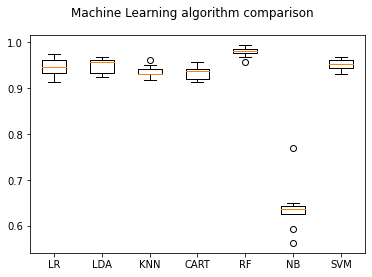

In [26]:
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf.fit(trainDataGlobal, trainLabelsGlobal)


RandomForestClassifier(random_state=9)

In [28]:
y_predict=clf.predict(testDataGlobal)
y_predict

array([0, 1, 0, 3, 1, 3, 1, 0, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 3, 0, 3, 0,
       1, 1, 3, 0, 3, 0, 2, 3, 2, 2, 1, 3, 0, 3, 3, 2, 1, 2, 3, 1, 3, 3,
       1, 0, 2, 3, 0, 3, 0, 1, 2, 0, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3, 0, 1,
       0, 3, 3, 0, 0, 2, 0, 0, 2, 2, 3, 1, 0, 2, 0, 3, 1, 3, 3, 3, 0, 2,
       0, 3, 0, 3, 3, 1, 3, 1, 2, 3, 0, 1, 3, 3, 3, 0, 0, 1, 1, 0, 1, 3,
       1, 0, 2, 3, 1, 1, 1, 2, 2, 1, 0, 3, 2, 2, 0, 2, 0, 2, 1, 1, 3, 0,
       3, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 0, 2, 2, 1, 2, 2, 0, 3, 3, 0, 3,
       3, 3, 0, 2, 0, 3, 1, 1, 2, 1, 3, 1, 2, 2, 3, 0, 0, 1, 1, 3, 0, 3,
       3, 1, 3, 0, 2, 2, 3, 0, 2, 3, 0, 1, 0, 0, 0, 0, 1, 1, 3, 2, 1, 2,
       0, 3, 0, 0, 1, 0, 3, 3, 2, 3, 1, 0, 1, 1, 3, 3, 1, 2, 2, 3, 1, 3,
       2, 3, 1, 1, 3, 3, 0, 2, 0, 0, 3, 3, 2, 3, 3, 3, 1, 3, 2, 2, 3, 1,
       2, 2, 1, 2, 1, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 2, 0, 2, 2, 3, 2, 2,
       3, 2, 2, 3, 0, 1, 1, 1, 1, 0, 1, 3, 2, 3, 0, 1, 1, 0, 2, 0, 1, 2,
       2, 0, 0, 1, 3, 3, 0, 0, 0, 3, 1, 0, 2, 3, 3,

In [29]:
cm = confusion_matrix(testLabelsGlobal,y_predict)


<AxesSubplot:>

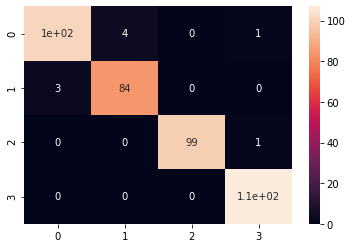

In [30]:
import seaborn as sns
sns.heatmap(cm ,annot=True)

In [31]:
print(classification_report(testLabelsGlobal,y_predict))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       106
           1       0.95      0.97      0.96        87
           2       1.00      0.99      0.99       100
           3       0.98      1.00      0.99       107

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict)


0.9775